testing save

 ## Importing Libraries

In [2248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2249]:
df = pd.read_csv('Terry_Stops.csv')

df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


In [2250]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,4.483800e+04,4.483800e+04,4.483800e+04,44838.000000
mean,2.048175e+09,2.017435e+13,2.744795e+09,1982.668585
std,3.929608e+09,1.628590e+10,5.137080e+09,9.293030
min,-1.000000e+00,2.009000e+13,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,1.733272e+05,1978.000000
50%,-1.000000e+00,2.018000e+13,3.866160e+05,1985.000000
75%,-1.000000e+00,2.019000e+13,5.501900e+05,1989.000000
max,1.755179e+10,2.020000e+13,1.755178e+10,1997.000000


In [2251]:
# checking for null, data type and name of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44838 non-null  object
 1   Subject ID                44838 non-null  int64 
 2   GO / SC Num               44838 non-null  int64 
 3   Terry Stop ID             44838 non-null  int64 
 4   Stop Resolution           44838 non-null  object
 5   Weapon Type               44838 non-null  object
 6   Officer ID                44838 non-null  object
 7   Officer YOB               44838 non-null  int64 
 8   Officer Gender            44838 non-null  object
 9   Officer Race              44838 non-null  object
 10  Subject Perceived Race    44838 non-null  object
 11  Subject Perceived Gender  44838 non-null  object
 12  Reported Date             44838 non-null  object
 13  Reported Time             44838 non-null  object
 14  Initial Call Type     

In [2252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44838 non-null  object
 1   Subject ID                44838 non-null  int64 
 2   GO / SC Num               44838 non-null  int64 
 3   Terry Stop ID             44838 non-null  int64 
 4   Stop Resolution           44838 non-null  object
 5   Weapon Type               44838 non-null  object
 6   Officer ID                44838 non-null  object
 7   Officer YOB               44838 non-null  int64 
 8   Officer Gender            44838 non-null  object
 9   Officer Race              44838 non-null  object
 10  Subject Perceived Race    44838 non-null  object
 11  Subject Perceived Gender  44838 non-null  object
 12  Reported Date             44838 non-null  object
 13  Reported Time             44838 non-null  object
 14  Initial Call Type     

In [2253]:
# checking for null values
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               580
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [2254]:
# drop the rows with null values and reset the index
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

In [2255]:
# check for duplicates
boolean = df.duplicated().any()
print(boolean, end='\n\n') # True

False



In [2256]:
df = df.replace('-', 'Unknown')

In [2257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44838 non-null  object
 1   Subject ID                44838 non-null  int64 
 2   GO / SC Num               44838 non-null  int64 
 3   Terry Stop ID             44838 non-null  int64 
 4   Stop Resolution           44838 non-null  object
 5   Weapon Type               44838 non-null  object
 6   Officer ID                44838 non-null  object
 7   Officer YOB               44838 non-null  int64 
 8   Officer Gender            44838 non-null  object
 9   Officer Race              44838 non-null  object
 10  Subject Perceived Race    44838 non-null  object
 11  Subject Perceived Gender  44838 non-null  object
 12  Reported Date             44838 non-null  object
 13  Reported Time             44838 non-null  object
 14  Initial Call Type     

In [2258]:
#look at the unique data of each column
for col in df.columns:
    print(col, '\n', df[col].unique(), '\n\n')

Subject Age Group 
 ['Unknown' '46 - 55' '56 and Above' '1 - 17' '18 - 25' '36 - 45' '26 - 35'] 


Subject ID 
 [         -1 16366865981  7726713382 ... 13855696527 13930427243
 14268071835] 


GO / SC Num 
 [20140000120677 20150000001463 20150000001516 ... 20200000211163
 20200000218545 20200000223475] 


Terry Stop ID 
 [      92317       28806       29599 ... 13855817033 13928574375
 14273492771] 


Stop Resolution 
 ['Arrest' 'Field Contact' 'Citation / Infraction' 'Offense Report'
 'Referred for Prosecution'] 


Weapon Type 
 ['None' 'Firearm Other' 'Lethal Cutting Instrument' 'Handgun' 'Unknown'
 'Club, Blackjack, Brass Knuckles' 'Knife/Cutting/Stabbing Instrument'
 'Other Firearm' 'Rifle' 'Fire/Incendiary Device'
 'Blunt Object/Striking Implement' 'Firearm (unk type)'
 'Mace/Pepper Spray' 'None/Not Applicable' 'Club' 'Firearm'
 'Taser/Stun Gun' 'Shotgun' 'Brass Knuckles' 'Automatic Handgun'
 'Blackjack'] 


Officer ID 
 ['7500  ' '5670  ' '4844  ' ... '8749  ' '6983  ' '5917  ']

In [2259]:
#look at the value counts of each column (not normalized)
def col_values(df):
    """
    For use in Preprocessing and cleaning to find placeholder values
    Input: Data frame
    Output: Counts of unique values for each column
    """
    for col in df.columns:
        print(col)
        print('\n')
        print(df[col].value_counts())
        print('-------------------------------------------------------')
        print('\n')
        
col_values(df)

Subject Age Group


26 - 35         14905
36 - 45          9460
18 - 25          9069
46 - 55          5768
56 and Above     2283
1 - 17           1935
Unknown          1418
Name: Subject Age Group, dtype: int64
-------------------------------------------------------


Subject ID


-1              34700
 7726859935        19
 7753260438        13
 7727117712        12
 7727600619         9
                ...  
 7730602336         1
 15879606630        1
 7758922092         1
 7727677812         1
 16219707395        1
Name: Subject ID, Length: 7945, dtype: int64
-------------------------------------------------------


GO / SC Num


20150000190790    16
20160000378750    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20180000358142     1
20200000180303     1
20190000045451     1
20170000158799     1
20180000071981     1
Name: GO / SC Num, Length: 35023, dtype: int64
-------------------------------------------------------


Terry Stop ID


130800

Name: Precinct, dtype: int64
-------------------------------------------------------


Sector


Unknown    9930
E          2337
M          2270
N          2191
K          1762
B          1658
L          1639
D          1512
K          1470
R          1455
F          1378
S          1348
U          1302
O          1161
J          1119
G          1087
C          1037
M          1027
Q           967
D           957
W           941
E           801
Q           609
N           574
O           497
F           486
R           473
S           416
B           388
G           370
U           367
J           337
W           330
C           298
L           291
99           53
Name: Sector, dtype: int64
-------------------------------------------------------


Beat


Unknown    9877
N3         1175
E2         1092
M2          852
K3          816
           ... 
J2           63
99           53
99           27
OOJ          20
S             2
Name: Beat, Length: 107, dtype: int64
----------------------

Initial Thoughts on How to Handle the Columns:

**Subject Age Group** none
**Subject ID**  drop since subjects are not required to present ID
**GO / SC Num**  drop because the numbers may have a one to many relationship
**Terry Stop ID**  drop as ID is not important when looking at relationships
**Stop Resolution** Categorize to Arrest(1) and Not Arrested(0)
**Weapon Type** Categorize to Weapon found at time of Frisk Yes(1) No(0)
**Officer ID** Create Bins of 0-99, 100-199, 200-299, 300-399
    Q: Were Officers with higher amount of cases/stops having high arrest percentage?
**Officer YOB**  Bin the birthdates
**Officer Gender**  Categorize to Female(1), Male(0)
**Officer Race**  Categorize to White(1), Not-White(0)
**Subject Perceived Race**  Drop as this is based on the officers' account and can be biased
**Subject Perceived Gender**  Categorize to only Female(1) and Male(0)
**Reported Date**  Categorize to Years (maybe bins)
**Reported Time**  Categorize to Day and Night shifts
**Initial Call Type**  Drop since majority is categorized as unknown
**Final Call Type** Drop since majority is categorized as unknown
**Call Type**  Categorize as 911(1) and not911(0)
**Officer Squad**  Drop too much room for error in trying to evaluate this data set
**Arrest Flag** Good
**Frisk Flag**  Drop rows with 'unknown' as this is a small amount
**Precinct** fix OOJ and FK ERROR. May help with location of dispatched officer
**Sector**. May help with location of dispatched officer
Beat**  Precinct,Sector and Beat are together with identifying location of dispatch

In [2260]:
# show names of columns
for col in df.columns:
    print(col)

Subject Age Group
Subject ID
GO / SC Num
Terry Stop ID
Stop Resolution
Weapon Type
Officer ID
Officer YOB
Officer Gender
Officer Race
Subject Perceived Race
Subject Perceived Gender
Reported Date
Reported Time
Initial Call Type
Final Call Type
Call Type
Officer Squad
Arrest Flag
Frisk Flag
Precinct
Sector
Beat


Make the columns python friendly 

In [2261]:
df.columns = ['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat']
df.columns


Index(['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat'],
      dtype='object')

In [2262]:
def replace_val(df, column, old, new):
        """
        Input: data frame, specific column, list (must in list format, even if 
        it's a single value) of values you would like to change (old), and a 
        new value to replace each item with.
        
        Output: Data frame with each old value in list changed to the new 
        value.
        """
        
        for i in range(len(df[column])):
            for j in range(len(old)): 
                if df[column].iloc[i] == old[j]:
                    df[column].iloc[i] = df[column].iloc[i].replace(old[j], 
                                                                    new)

In [2263]:
df.subject_age_group.value_counts()

26 - 35         14905
36 - 45          9460
18 - 25          9069
46 - 55          5768
56 and Above     2283
1 - 17           1935
Unknown          1418
Name: subject_age_group, dtype: int64

In [2264]:
replace_val(df, 'subject_age_group', ['26 - 35'], '26_35')
replace_val(df, 'subject_age_group', ['18 - 25'], '18_25')
replace_val(df, 'subject_age_group', ['36 - 45'], '36_45')
replace_val(df, 'subject_age_group', ['46 - 55'], '46_55')
replace_val(df, 'subject_age_group', ['56 and Above'], '56_100')
replace_val(df, 'subject_age_group', ['1 - 17'], '1_17')
replace_val(df, 'subject_age_group', ['Unknown'], '26_35')

In [2265]:
df.subject_age_group.value_counts()

26_35     16323
36_45      9460
18_25      9069
46_55      5768
56_100     2283
1_17       1935
Name: subject_age_group, dtype: int64

## **Scrubbing**

In [2266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44838 non-null  object
 1   subject_id                44838 non-null  int64 
 2   go_sc_num                 44838 non-null  int64 
 3   terry_stop_id             44838 non-null  int64 
 4   stop_resolution           44838 non-null  object
 5   weapon_type               44838 non-null  object
 6   officer_id                44838 non-null  object
 7   officer_yob               44838 non-null  int64 
 8   officer_gender            44838 non-null  object
 9   officer_race              44838 non-null  object
 10  subject_perceived_race    44838 non-null  object
 11  subject_perceived_gender  44838 non-null  object
 12  reported_date             44838 non-null  object
 13  reported_time             44838 non-null  object
 14  initial_call_type     

In [2267]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,26_35,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,26_35,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown
2,26_35,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,Unknown,Unknown,Unknown,NaN,N,Unknown,Unknown,Unknown,Unknown
3,26_35,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown
4,26_35,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown


In [2268]:
# df = df.drop(['go_sc_num','terry_stop_id','officer_id','sector','beat'], axis=1)
# df.columns

### Subject ID

Will need to feature engineer this to make a column for repeat offenders and drop subject_id

In [2269]:
import numpy as np

df['repeat_offenders'] = np.nan

for i in range(len(df['subject_id'])):
    if df['subject_id'].iloc[i] > 1:
        df['repeat_offenders'].iloc[i] = 'Y'
    else:
        df['repeat_offenders'].iloc[i] = 'N'

df['repeat_offenders'].value_counts()

N    34700
Y    10138
Name: repeat_offenders, dtype: int64

In [2270]:
df.subject_id.value_counts()

-1              34700
 7726859935        19
 7753260438        13
 7727117712        12
 7727600619         9
                ...  
 7730602336         1
 15879606630        1
 7758922092         1
 7727677812         1
 16219707395        1
Name: subject_id, Length: 7945, dtype: int64

In [2271]:
df['subject_id'] = df.subject_id.replace(-1, 'unassigned')
df.subject_id.value_counts()

unassigned     34700
7726859935        19
7753260438        13
7727117712        12
7727600619         9
               ...  
7727409564         1
10372082077        1
7726246304         1
7726914788         1
7729725441         1
Name: subject_id, Length: 7945, dtype: int64

## General Offense/Street Check Number (go_sc_num)

In [2272]:
df.go_sc_num.value_counts()

20150000190790    16
20160000378750    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20180000358142     1
20200000180303     1
20190000045451     1
20170000158799     1
20180000071981     1
Name: go_sc_num, Length: 35023, dtype: int64

In [2273]:
stop_chk = df[df['go_sc_num'] == 20160000378750]
stop_chk

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
6595,18_25,unassigned,20160000378750,208302,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
6596,18_25,unassigned,20160000378750,208311,Arrest,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16761,26_35,unassigned,20160000378750,208300,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16762,26_35,unassigned,20160000378750,208301,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16763,26_35,unassigned,20160000378750,208303,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16764,26_35,unassigned,20160000378750,208307,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
30073,36_45,unassigned,20160000378750,208299,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
30074,36_45,unassigned,20160000378750,208305,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
30075,36_45,unassigned,20160000378750,208308,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
30076,36_45,unassigned,20160000378750,208310,Offense Report,None,7492,1983,M,White,...,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N


From the dates, the separate Terry Stop ID's, the different Stop Resolutions and it all roughly happening within the same hour, it appears that this was a dispute of some sort in which an officer collected Offense Reports from 12 people and issued out tickets to 4 people (because there was no physical arrest denoted by the column 'arrest_flag', these were non-custodial arrests/citations).

Looking back at the Column Description document, the GO/SC Number is considered the "parent report" that contain associated Terry Stops. This confirms my observations.

### Terry Stop ID

In [2274]:
# Find out why there are duplicate ID's in this column
dup_ids = df[df['terry_stop_id'].duplicated(keep=False)]
dup_ids = dup_ids[['subject_age_group', 'subject_id', 'go_sc_num', 
                   'terry_stop_id', 'stop_resolution', 'weapon_type',
                   'officer_id', 'reported_date', 'reported_time',
                   'initial_call_type', 'final_call_type', 'arrest_flag',
                   'frisk_flag' ]]
dup_ids

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,reported_date,reported_time,initial_call_type,final_call_type,arrest_flag,frisk_flag
3288,1_17,11637443950,20190000465104,12105013403,Arrest,Knife/Cutting/Stabbing Instrument,8500,2019-12-17T00:00:00,00:13:50,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,Y,Y
3289,1_17,11637443950,20190000465104,12105013403,Arrest,Mace/Pepper Spray,8500,2019-12-17T00:00:00,00:13:50,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,Y,Y
11168,18_25,7730702138,20200000235966,15045077325,Arrest,Blunt Object/Striking Implement,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
11169,18_25,7730702138,20200000235966,15045077325,Arrest,Fire/Incendiary Device,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
11170,18_25,7730702138,20200000235966,15045077325,Arrest,Knife/Cutting/Stabbing Instrument,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
11546,18_25,7764935851,20200000080922,12689034912,Field Contact,Blunt Object/Striking Implement,7667,2020-03-04T00:00:00,19:52:40,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON, PERSON WITH - GUN",N,Y
11547,18_25,7764935851,20200000080922,12689034912,Field Contact,Knife/Cutting/Stabbing Instrument,7667,2020-03-04T00:00:00,19:52:40,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON, PERSON WITH - GUN",N,Y
11883,18_25,9458419522,20190000285750,9585545373,Field Contact,Firearm,8382,2019-08-03T00:00:00,22:50:59,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
11884,18_25,9458419522,20190000285750,9585545373,Field Contact,Handgun,8382,2019-08-03T00:00:00,22:50:59,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
12088,18_25,11896724492,20190000454262,12034618758,Arrest,Knife/Cutting/Stabbing Instrument,7782,2019-12-08T00:00:00,15:41:10,DIST - IP/JO - DV DIST - NO ASLT,"--WEAPON, PERSON WITH - GUN",Y,Y


In [2275]:
df = df.drop_duplicates('terry_stop_id', keep='first')
df

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
0,26_35,unassigned,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N
1,26_35,unassigned,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N
2,26_35,unassigned,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,Unknown,Unknown,Unknown,NaN,N,Unknown,Unknown,Unknown,Unknown,N
3,26_35,unassigned,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N
4,26_35,unassigned,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,Unknown,Unknown,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44833,56_100,13852338055,20200000209169,13852344465,Field Contact,Knife/Cutting/Stabbing Instrument,8537,1988,M,Black or African American,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,SOUTH PCT 3RD W - ROBERT,N,Y,South,S,S2,Y
44834,56_100,13855399471,20200000210914,13855407067,Offense Report,Unknown,8465,1990,M,White,...,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"--ASSAULTS - HARASSMENT, THREATS",911,NORTH PCT 3RD W - BOY,N,N,North,B,B3,Y
44835,56_100,13855696527,20200000211163,13855817033,Arrest,Unknown,8626,1992,M,White,...,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,WEST PCT 1ST W - KING/QUEEN,Y,N,West,M,M3,Y
44836,56_100,13930427243,20200000218545,13928574375,Field Contact,Unknown,8672,1995,F,Hispanic or Latino,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--PROWLER - GENERAL,911,NORTH PCT 3RD W - LINCOLN,N,N,North,L,L1,Y


### Stop Resolution

In [2276]:
df.stop_resolution.value_counts()

Field Contact               17960
Offense Report              15120
Arrest                      10831
Referred for Prosecution      728
Citation / Infraction         175
Name: stop_resolution, dtype: int64

Since the above is getting data after stop is made I only want to know if arrest was made. This is because a resolution doesn't work for prediction modeling and the arrest is what we want to know.

In [2277]:
arrest_made = [] # Initialize a an Empty List
for value in df['stop_resolution']:
    if value == 'Arrest': # Replace "None" Values with "Y" 
        arrest_made.append('Y')
    else:
        arrest_made.append('N') # Replace Other Values with "N" 
df['arrest_made'] = arrest_made # Create a New Column Called "arrest_made"
df = df.drop(['stop_resolution'], axis=1) # Drop Column stop_resolution
df.info() # Print First 5 Rows of DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44814 entries, 0 to 44837
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44814 non-null  object
 1   subject_id                44814 non-null  object
 2   go_sc_num                 44814 non-null  int64 
 3   terry_stop_id             44814 non-null  int64 
 4   weapon_type               44814 non-null  object
 5   officer_id                44814 non-null  object
 6   officer_yob               44814 non-null  int64 
 7   officer_gender            44814 non-null  object
 8   officer_race              44814 non-null  object
 9   subject_perceived_race    44814 non-null  object
 10  subject_perceived_gender  44814 non-null  object
 11  reported_date             44814 non-null  object
 12  reported_time             44814 non-null  object
 13  initial_call_type         44814 non-null  object
 14  final_call_type       

### Weapons Type

In [2278]:
df.weapon_type.value_counts()

None                                 32565
Unknown                               9671
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      483
Handgun                                280
Firearm Other                          100
Blunt Object/Striking Implement         66
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       16
Other Firearm                           15
Firearm (unk type)                      15
Club                                     9
Rifle                                    7
None/Not Applicable                      7
Taser/Stun Gun                           5
Fire/Incendiary Device                   3
Shotgun                                  3
Automatic Handgun                        2
Blackjack                                1
Brass Knuckles                           1
Name: weapon_type, dtype: int64

The above data shows there are duplicates because a single person can be carrying multiple weapons type and the officer must create a separate entry for each weapon.

I will drop the duplicates to help clean up those wrongefully classified as 'Repeat Offenders'

In [2279]:
# Switch Weapon Type to Weapon (0's & 1's)
weapon = [] # Initialize a an Empty List
for value in df['weapon_type']:
    if value == 'None': # Replace "None" Values with "0" 
        weapon.append(0)
    else:
        weapon.append(1) # Replace Other Values with "0" 
df['weapon'] = weapon # Create a New Column Called "Weapon"
df.head() # Print First 5 Rows of DataFrame

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,...,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made,weapon
0,26_35,unassigned,20140000120677,92317,None,7500,1984,M,Black or African American,Asian,...,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N,Y,0
1,26_35,unassigned,20150000001463,28806,None,5670,1965,M,White,Unknown,...,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N,N,0
2,26_35,unassigned,20150000001516,29599,None,4844,1961,M,White,White,...,Unknown,NaN,N,Unknown,Unknown,Unknown,Unknown,N,N,0
3,26_35,unassigned,20150000001670,32260,None,7539,1963,M,White,Unknown,...,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N,N,0
4,26_35,unassigned,20150000001739,33155,None,6973,1977,M,White,Black or African American,...,Unknown,NaN,N,N,Unknown,Unknown,Unknown,N,N,0


In [2280]:
def replace_val(df, column, old, new):
        """
        Input: data frame, specific column, list (must in list format, even if 
        it's a single value) of values you would like to change (old), and a 
        new value to replace each item with.
        
        Output: Data frame with each old value in list changed to the new 
        value.
        """
        
        for i in range(len(df[column])):
            for j in range(len(old)): 
                if df[column].iloc[i] == old[j]:
                    df[column].iloc[i] = df[column].iloc[i].replace(old[j], 
                                                                    new)

In [2281]:
# weapon types to replace
# none = ['None/Not Applicable']

# knife = ['Lethal Cutting Instrument', 'Knife/Cutting/Stabbing Instrument']

# blunt_obj = ['Club, Blackjack, Brass Knuckles', 'Club', 'Blackjack', 
#              'Brass Knuckles']
# firearm = ['Firearm Other', 'Firearm (unk type)', 'Other Firearm', 'Rifle', 
#           'Shotgun', 'Automatic Handgun', 'Handgun']
# other = ['Taser/Stun Gun', 'Mace/Pepper Spray', 'Fire/Incendiary Device']

In [2282]:
# replacing none
# replace_val(df, 'weapon_type', none, 'None')

# # replacing knife
# replace_val(df, 'weapon_type', knife, 'Knife/Stabbing Instrument')

# # replacing blunt object
# replace_val(df, 'weapon_type', blunt_obj, 'Blunt Object/Striking Implement')

# # replacing firearm
# replace_val(df, 'weapon_type', firearm, 'Firearm')

# # other
# replace_val(df, 'weapon_type', other, 'Other')

In [2283]:
df.weapon.value_counts()

0    32565
1    12249
Name: weapon, dtype: int64

In [2284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44814 entries, 0 to 44837
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44814 non-null  object
 1   subject_id                44814 non-null  object
 2   go_sc_num                 44814 non-null  int64 
 3   terry_stop_id             44814 non-null  int64 
 4   weapon_type               44814 non-null  object
 5   officer_id                44814 non-null  object
 6   officer_yob               44814 non-null  int64 
 7   officer_gender            44814 non-null  object
 8   officer_race              44814 non-null  object
 9   subject_perceived_race    44814 non-null  object
 10  subject_perceived_gender  44814 non-null  object
 11  reported_date             44814 non-null  object
 12  reported_time             44814 non-null  object
 13  initial_call_type         44814 non-null  object
 14  final_call_type       

### Officer ID
   

In [2285]:
df.officer_id.value_counts()

7456      401
7634      339
7773      306
7765      304
7758      299
         ... 
4729        1
6231        1
5014        1
5469        1
6808        1
Name: officer_id, Length: 1178, dtype: int64

In [2286]:
# this will be dropped, not needed
df = df.drop(['officer_id'], axis =1) 

In [2287]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44814 entries, 0 to 44837
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44814 non-null  object
 1   subject_id                44814 non-null  object
 2   go_sc_num                 44814 non-null  int64 
 3   terry_stop_id             44814 non-null  int64 
 4   weapon_type               44814 non-null  object
 5   officer_yob               44814 non-null  int64 
 6   officer_gender            44814 non-null  object
 7   officer_race              44814 non-null  object
 8   subject_perceived_race    44814 non-null  object
 9   subject_perceived_gender  44814 non-null  object
 10  reported_date             44814 non-null  object
 11  reported_time             44814 non-null  object
 12  initial_call_type         44814 non-null  object
 13  final_call_type           44814 non-null  object
 14  call_type             

### Report Date/Age of Officer

In [2288]:
df.reported_date.head()

0    2015-10-16T00:00:00
1    2015-03-19T00:00:00
2    2015-03-21T00:00:00
3    2015-04-01T00:00:00
4    2015-04-03T00:00:00
Name: reported_date, dtype: object

In [2289]:
# removing the time tag
df['reported_date'] = df['reported_date'].str.replace(r'T00:00:00$','')
df.reported_date.value_counts()

2015-10-01    101
2015-09-29     66
2015-05-28     57
2015-07-18     55
2019-04-26     54
             ... 
2015-03-15      1
2015-05-06      1
2015-04-28      1
2015-03-24      1
2015-05-10      1
Name: reported_date, Length: 2064, dtype: int64

In [2290]:
 # converting to date time
import datetime as dt

df['reported_date'] = pd.to_datetime(df['reported_date'])
# creating column containing the incident year 
df['incident_year'] = df['reported_date'].dt.year
df['incident_year'].value_counts()

2018    8883
2019    8242
2016    7715
2017    7488
2015    7059
2020    5427
Name: incident_year, dtype: int64

In [2291]:
df['incident_month'] = df['reported_date'].dt.month
df['incident_month'].head()

0    10
1     3
2     3
3     4
4     4
Name: incident_month, dtype: int64

In [2292]:
df = df.drop('reported_date', axis=1)

#### Feature Engineer Officer's Age

In [2293]:
df['officer_age'] = df['incident_year'] - df['officer_yob']
df['officer_age']

0        31
1        50
2        54
3        52
4        38
         ..
44833    32
44834    30
44835    28
44836    25
44837    26
Name: officer_age, Length: 44814, dtype: int64

In [2294]:
#df = df.drop('officer_yob', axis=1)

In [2295]:
df.officer_age.value_counts()

31     2998
30     2820
33     2725
32     2657
29     2479
34     2422
28     2382
27     2102
26     2083
35     1815
25     1796
24     1666
36     1335
37     1257
38     1176
39     1058
40      984
42      886
23      881
41      838
45      742
44      733
46      701
48      638
43      637
47      622
49      579
50      565
54      443
51      419
53      396
52      344
55      319
56      264
22      251
57      229
58      181
59       94
60       76
61       39
63       34
119      28
120      25
21       19
62       19
65       16
64       14
67       12
68        4
118       3
116       2
66        2
70        1
69        1
117       1
115       1
Name: officer_age, dtype: int64

In [2296]:
# drop the ages that don't make sense
df = df[df['officer_age'] != 120]  
df = df[df['officer_age'] != 118]
df = df[df['officer_age'] != 116]
df = df[df['officer_age'] != 119]
df = df[df['officer_age'] != 115]
df = df[df['officer_age'] != 117]
df.officer_age.unique()

array([31, 50, 54, 52, 38, 42, 30, 29, 51, 56, 36, 34, 46, 32, 49, 47, 28,
       63, 45, 39, 43, 33, 24, 27, 44, 37, 25, 40, 48, 23, 53, 35, 67, 26,
       62, 41, 55, 57, 58, 22, 59, 60, 61, 69, 66, 70, 21, 64, 68, 65])

### Reported Time

Here I want to categorize the time of day of the reports

In [2297]:
df['reported_time'] = pd.to_datetime(df['reported_time'])
df['reported_hour'] = df['reported_time'].dt.hour
df.reported_hour.head()

0    11
1     7
2    19
3     4
4     0
Name: reported_hour, dtype: int64

In [2298]:
df = df.drop('reported_time', axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44754 entries, 0 to 44837
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44754 non-null  object
 1   subject_id                44754 non-null  object
 2   go_sc_num                 44754 non-null  int64 
 3   terry_stop_id             44754 non-null  int64 
 4   weapon_type               44754 non-null  object
 5   officer_yob               44754 non-null  int64 
 6   officer_gender            44754 non-null  object
 7   officer_race              44754 non-null  object
 8   subject_perceived_race    44754 non-null  object
 9   subject_perceived_gender  44754 non-null  object
 10  initial_call_type         44754 non-null  object
 11  final_call_type           44754 non-null  object
 12  call_type                 44754 non-null  object
 13  officer_squad             44207 non-null  object
 14  arrest_flag           

### Call Types

In [2299]:
df['call_type'].value_counts()

911                              19858
Unknown                          13003
ONVIEW                            8480
TELEPHONE OTHER, NOT 911          3114
ALARM CALL (NOT POLICE ALARM)      292
TEXT MESSAGE                         6
SCHEDULED EVENT (RECURRING)          1
Name: call_type, dtype: int64

In [2300]:
# Switch Call Type to Call Made/No Call Made (0's & 1's)
call_made = [] # Initialize a an Empty List
for value in df['call_type']:
    if value == 'Unknown':  
        call_made.append(0) # Replace "-" Values with "0"
    else:
        call_made.append(1) # Replace Other Values with "1"
df['call_made'] = call_made
df = df.drop('call_type', axis=1)
df.head() # Print First 5 Rows of DataFrame

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,...,sector,beat,repeat_offenders,arrest_made,weapon,incident_year,incident_month,officer_age,reported_hour,call_made
0,26_35,unassigned,20140000120677,92317,None,1984,M,Black or African American,Asian,Male,...,O,O2,N,Y,0,2015,10,31,11,0
1,26_35,unassigned,20150000001463,28806,None,1965,M,White,Unknown,Unknown,...,Unknown,Unknown,N,N,0,2015,3,50,7,0
2,26_35,unassigned,20150000001516,29599,None,1961,M,White,White,Male,...,Unknown,Unknown,N,N,0,2015,3,54,19,0
3,26_35,unassigned,20150000001670,32260,None,1963,M,White,Unknown,Unknown,...,Unknown,Unknown,N,N,0,2015,4,52,4,0
4,26_35,unassigned,20150000001739,33155,None,1977,M,White,Black or African American,Male,...,Unknown,Unknown,N,N,0,2015,4,38,0,0


### Officer Squad

In [2301]:
df.officer_squad.isna().value_counts()

False    44207
True       547
Name: officer_squad, dtype: int64

In [2302]:

# df = df.copy()
# df = adf.drop('officer_squad', axis=1)
# df.columns

### Arrest Flag

In [2303]:
df.arrest_flag.value_counts()

N    42136
Y     2618
Name: arrest_flag, dtype: int64

In [2304]:
# arrest_made = [] # Initialize a an Empty List

# for value in df['arrest_flag']:
#     if value == 'N':  
#         arrest_made.append(0) # Replace "N" Values with "0"
#     else:
#         arrest_made.append(1) # Replace "Y" Values with "1"
# df['arrest_flag'] = arrest_made # Create a New Column Called "Arrest Made"
# df = df.drop('arrest_flag', axis=1)
# df.head() # Print First 5 Rows of DataFrame


In [2305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44754 entries, 0 to 44837
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44754 non-null  object
 1   subject_id                44754 non-null  object
 2   go_sc_num                 44754 non-null  int64 
 3   terry_stop_id             44754 non-null  int64 
 4   weapon_type               44754 non-null  object
 5   officer_yob               44754 non-null  int64 
 6   officer_gender            44754 non-null  object
 7   officer_race              44754 non-null  object
 8   subject_perceived_race    44754 non-null  object
 9   subject_perceived_gender  44754 non-null  object
 10  initial_call_type         44754 non-null  object
 11  final_call_type           44754 non-null  object
 12  officer_squad             44207 non-null  object
 13  arrest_flag               44754 non-null  object
 14  frisk_flag            

### Officer Gender

In [2306]:
df.officer_gender.value_counts()

M    39656
F     5098
Name: officer_gender, dtype: int64

### Subject Preceived Gender

In [2307]:
def replace_val(df, column, old, new):
        """
        Input: data frame, specific column, list (must in list format, even if 
        it's a single value) of values you would like to change (old), and a 
        new value to replace each item with.
        
        Output: Data frame with each old value in list changed to the new 
        value.
        """
        
        for i in range(len(df[column])):
            for j in range(len(old)): 
                if df[column].iloc[i] == old[j]:
                    df[column].iloc[i] = df[column].iloc[i].replace(old[j], 
                                                                    new)

In [2308]:
df.subject_perceived_gender.value_counts()

Male                                                         34997
Female                                                        9144
Unable to Determine                                            326
Unknown                                                        283
Gender Diverse (gender non-conforming and/or transgender)        4
Name: subject_perceived_gender, dtype: int64

In [2309]:
#combine unknown and unable to determine
unknown = ['Unknown']
replace_val(df, 'subject_perceived_gender', unknown, 'Unable to Determine')
df.subject_perceived_gender.value_counts()

Male                                                         34997
Female                                                        9144
Unable to Determine                                            609
Gender Diverse (gender non-conforming and/or transgender)        4
Name: subject_perceived_gender, dtype: int64

In [2310]:
# since there are only 4 instances of gender diverse, I will drop it. 
df = df[df['subject_perceived_gender'] != 
          'Gender Diverse (gender non-conforming and/or transgender)']
df.subject_perceived_gender.value_counts()

Male                   34997
Female                  9144
Unable to Determine      609
Name: subject_perceived_gender, dtype: int64

### Compare Officer Race to Subject Perceived Race

Lets make the column values equal

In [2311]:
unknown = ['Unknown']
replace_val(df, 'officer_race', unknown, 'Not Specified')
df.officer_race.value_counts()

White                            34088
Hispanic or Latino                2547
Two or More Races                 2483
Asian                             1849
Black or African American         1791
Not Specified                     1244
Nat Hawaiian/Oth Pac Islander      437
American Indian/Alaska Native      311
Name: officer_race, dtype: int64

In [2312]:
df.subject_perceived_race.value_counts()

White                                        21870
Black or African American                    13347
Unknown                                       4120
Hispanic                                      1683
Asian                                         1427
American Indian or Alaska Native              1300
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       42
Name: subject_perceived_race, dtype: int64

In [2313]:
other = ['Native Hawaiian or Other Pacific Islander']

replace_val(df, 'subject_perceived_race',other , 'Other')

In [2314]:
df.subject_perceived_race.value_counts()

White                               21870
Black or African American           13347
Unknown                              4120
Hispanic                             1683
Asian                                1427
American Indian or Alaska Native     1300
Multi-Racial                          809
Other                                 194
Name: subject_perceived_race, dtype: int64

In [2315]:
races = df[['officer_race', 'subject_perceived_race']]
col_values(races)

officer_race


White                            34088
Hispanic or Latino                2547
Two or More Races                 2483
Asian                             1849
Black or African American         1791
Not Specified                     1244
Nat Hawaiian/Oth Pac Islander      437
American Indian/Alaska Native      311
Name: officer_race, dtype: int64
-------------------------------------------------------


subject_perceived_race


White                               21870
Black or African American           13347
Unknown                              4120
Hispanic                             1683
Asian                                1427
American Indian or Alaska Native     1300
Multi-Racial                          809
Other                                 194
Name: subject_perceived_race, dtype: int64
-------------------------------------------------------




In [2316]:
native = ['American Indian/Alaska Native', 'American Indian or Alaska Native']
multi = ['Two or More Races']
other = ['Nat Hawaiian/Oth Pac Islander']
unknown = ['Unknown']
hispanic = ['Hispanic or Latino']
# native
replace_val(df, 'officer_race', native, 'Native American')
replace_val(df, 'subject_perceived_race', native, 'Native American')
# multi
replace_val(df, 'officer_race', multi, 'Multi-Racial')
# other
replace_val(df, 'officer_race', other, 'Other')
# unknown
replace_val(df, 'subject_perceived_race', unknown, 'Not Specified')
# hispanic
replace_val(df, 'officer_race', hispanic, 'Hispanic')

df.officer_race.unique()

array(['Black or African American', 'White', 'Hispanic', 'Asian',
       'Native American', 'Multi-Racial', 'Not Specified', 'Other'],
      dtype=object)

In [2317]:
# checking subject race values
df.subject_perceived_race.unique()

array(['Asian', 'Not Specified', 'White', 'Black or African American',
       'Other', 'Native American', 'Hispanic', 'Multi-Racial'],
      dtype=object)

In [2318]:
df['dif_race'] = np.nan

for i in range(len(df['officer_race'])):
    if df['officer_race'].iloc[i] != df['subject_perceived_race'].iloc[i]:
        df['dif_race'].iloc[i] = 'Y'
    else:
        df['dif_race'].iloc[i] = 'N'

df['dif_race'].value_counts()

Y    26906
N    17844
Name: dif_race, dtype: int64

In [2319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44750 non-null  object
 1   subject_id                44750 non-null  object
 2   go_sc_num                 44750 non-null  int64 
 3   terry_stop_id             44750 non-null  int64 
 4   weapon_type               44750 non-null  object
 5   officer_yob               44750 non-null  int64 
 6   officer_gender            44750 non-null  object
 7   officer_race              44750 non-null  object
 8   subject_perceived_race    44750 non-null  object
 9   subject_perceived_gender  44750 non-null  object
 10  initial_call_type         44750 non-null  object
 11  final_call_type           44750 non-null  object
 12  officer_squad             44203 non-null  object
 13  arrest_flag               44750 non-null  object
 14  frisk_flag            

### Gender Difference

Create a column that identifies if a difference between officer and subjects' gender

In [2320]:
#First, we'll change the values in Subject Gender to match those of Officer Gender.

male = ['Male']
female = ['Female']

replace_val(df, 'subject_perceived_gender', male, 'M')
replace_val(df, 'subject_perceived_gender', female, 'F')

In [2321]:
df['dif_gender'] = np.nan

for i in range(len(df['officer_gender'])):
    if df['officer_gender'].iloc[i] == df['subject_perceived_gender'].iloc[i]:
        df['dif_gender'].iloc[i] = 'N'
    else:
        df['dif_gender'].iloc[i] = 'Y'

df['dif_gender'].value_counts()

N    32202
Y    12548
Name: dif_gender, dtype: int64

In [2322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44750 non-null  object
 1   subject_id                44750 non-null  object
 2   go_sc_num                 44750 non-null  int64 
 3   terry_stop_id             44750 non-null  int64 
 4   weapon_type               44750 non-null  object
 5   officer_yob               44750 non-null  int64 
 6   officer_gender            44750 non-null  object
 7   officer_race              44750 non-null  object
 8   subject_perceived_race    44750 non-null  object
 9   subject_perceived_gender  44750 non-null  object
 10  initial_call_type         44750 non-null  object
 11  final_call_type           44750 non-null  object
 12  officer_squad             44203 non-null  object
 13  arrest_flag               44750 non-null  object
 14  frisk_flag            

### Difference in Race and Gender

In [2323]:
df['dif_race_gender'] = np.nan

for i in range(len(df['dif_race'])):
    if (df['dif_race'].iloc[i] == 'N') and (df['dif_gender'].iloc[i] == 'N'):
        df['dif_race_gender'].iloc[i] = 'N'
    else:
        df['dif_race_gender'].iloc[i] = 'Y'

df['dif_race_gender'].value_counts()

Y    31918
N    12832
Name: dif_race_gender, dtype: int64

### Precinct, Sector, and Beat

Arrests and frisks were performed, and most of them took place in June 2019 (the rest are random within 2019 and 2020) so 'FK ERROR' must be an error in which CAD system failed to capture the associated Precinct, Sector, and Beat the incident took place in (Beat 99 does not exist). These are not fake calls or fake stops, so we can make the changes.

In [2324]:
prec = ['FK ERROR', 'OOJ'] # OOJ stands for Obstruction of Justice

sect = ['99    ']

beats = ['99', '99','99    ', 'OOJ']

In [2325]:
# precinct
replace_val(df=df, column='precinct', old=prec, new='Unknown')
# sector
replace_val(df=df, column='sector', old=sect, new='Unknown')
# beat
replace_val(df=df, column='beat', old=beats, new='Unknown')

In [2326]:
print(df.precinct.value_counts())
print(df.sector.value_counts())
print(df.beat.value_counts())

West         10535
Unknown       9969
North         9861
East          5919
South         5341
Southwest     2320
SouthWest      805
Name: precinct, dtype: int64
Unknown    9975
E          2337
M          2270
N          2190
K          1762
B          1657
L          1639
D          1512
K          1457
R          1455
F          1378
S          1348
U          1302
O          1161
J          1119
G          1087
C          1037
M          1016
Q           966
D           945
W           941
E           792
Q           603
N           574
O           497
F           480
R           467
S           414
B           385
G           367
U           366
J           337
W           325
C           298
L           291
Name: sector, dtype: int64
Unknown    9969
N3         1174
E2         1092
M2          852
K3          810
           ... 
U3           72
N1           63
J2           63
C2           63
S             2
Name: beat, Length: 104, dtype: int64


In [2327]:
sect = ['99    ']

beats = ['99    ']
# sector
replace_val(df=df, column='sector', old=sect, new='Unknown')
# beat
replace_val(df=df, column='beat', old=beats, new='Unknown')

print(df.sector.value_counts())
print(df.beat.value_counts())

Unknown    9975
E          2337
M          2270
N          2190
K          1762
B          1657
L          1639
D          1512
K          1457
R          1455
F          1378
S          1348
U          1302
O          1161
J          1119
G          1087
C          1037
M          1016
Q           966
D           945
W           941
E           792
Q           603
N           574
O           497
F           480
R           467
S           414
B           385
G           367
U           366
J           337
W           325
C           298
L           291
Name: sector, dtype: int64
Unknown    9969
N3         1174
E2         1092
M2          852
K3          810
           ... 
U3           72
N1           63
J2           63
C2           63
S             2
Name: beat, Length: 104, dtype: int64


### Time

Need to bin the times into morning, afternoon, evening and after midnight. 

#### Add Dummies

Text(0, 0.5, 'value counts')

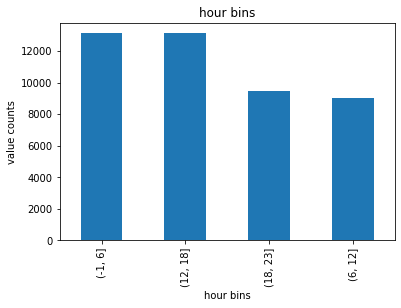

In [2328]:
import matplotlib.pyplot as plt
%matplotlib inline

bins = [-1, 6, 12, 18, 23]
bin_hr = pd.cut(df['reported_hour'], bins)
bin_hr = bin_hr.cat.as_ordered()

bin_hr.value_counts().plot(kind='bar')
plt.title('hour bins')
plt.xlabel('hour bins')
plt.ylabel('value counts')

In [2329]:
# now to afix this to our data frame and create dummies
df['time'] = bin_hr
df['time'] = df['time'].cat.codes
# Creating dummies
gbin_dummies = pd.get_dummies(bin_hr, prefix='hour') 

# keeping first column for now

df = df.drop(['time'], axis=1)
df = pd.concat([df, gbin_dummies], axis=1)
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,...,officer_age,reported_hour,call_made,dif_race,dif_gender,dif_race_gender,"hour_(-1, 6]","hour_(6, 12]","hour_(12, 18]","hour_(18, 23]"
0,26_35,unassigned,20140000120677,92317,None,1984,M,Black or African American,Asian,M,...,31,11,0,Y,N,Y,0,1,0,0
1,26_35,unassigned,20150000001463,28806,None,1965,M,White,Not Specified,Unable to Determine,...,50,7,0,Y,Y,Y,0,1,0,0
2,26_35,unassigned,20150000001516,29599,None,1961,M,White,White,M,...,54,19,0,N,N,N,0,0,0,1
3,26_35,unassigned,20150000001670,32260,None,1963,M,White,Not Specified,Unable to Determine,...,52,4,0,Y,Y,Y,1,0,0,0
4,26_35,unassigned,20150000001739,33155,None,1977,M,White,Black or African American,M,...,38,0,0,Y,N,Y,1,0,0,0


In [2330]:
df = df.rename(columns={'hour_(-1, 6]':'12am_6am', 
                          'hour_(6, 12]':'7am_12pm', 
                           'hour_(12, 18]':'1pm_6pm', 
                          'hour_(18, 23]':'7pm_11pm'})

In [2331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44750 non-null  object
 1   subject_id                44750 non-null  object
 2   go_sc_num                 44750 non-null  int64 
 3   terry_stop_id             44750 non-null  int64 
 4   weapon_type               44750 non-null  object
 5   officer_yob               44750 non-null  int64 
 6   officer_gender            44750 non-null  object
 7   officer_race              44750 non-null  object
 8   subject_perceived_race    44750 non-null  object
 9   subject_perceived_gender  44750 non-null  object
 10  initial_call_type         44750 non-null  object
 11  final_call_type           44750 non-null  object
 12  officer_squad             44203 non-null  object
 13  arrest_flag               44750 non-null  object
 14  frisk_flag            

In [2333]:
df.to_csv('cleaned_terry_stop_for_eda.csv')

In [2336]:
dfm = df

In [2353]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   subject_id                                     44750 non-null  category
 1   go_sc_num                                      44750 non-null  category
 2   terry_stop_id                                  44750 non-null  category
 3   weapon_type                                    44750 non-null  category
 4   officer_yob                                    44750 non-null  category
 5   officer_race                                   44750 non-null  category
 6   subject_perceived_race                         44750 non-null  category
 7   initial_call_type                              44750 non-null  category
 8   final_call_type                                44750 non-null  category
 9   officer_squad                          

In [2350]:
for col in dfm.columns:
    dfm[col] = dfm[col].astype('category')

In [2345]:
# Listing all of the columns to make dummies from
dummy = ['officer_gender', 'subject_perceived_gender', 'arrest_flag', 
           'frisk_flag', 'dif_race', 'dif_gender', 'dif_race_gender', 
           'repeat_offenders', 'subject_age_group', 
           'offense_report']

In [2352]:
dummies = pd.get_dummies(dfm['subject_perceived_gender'])

KeyError: 'subject_perceived_gender'

In [2346]:
# for loop to iterate through list and concat them to the data frame
for col in dummy:
    dumdums = pd.get_dummies(dfm[str(col)], drop_first=True, prefix=f'{col}_') 
    dfm = pd.concat([dfm, dumdums], axis=1)
    dfm = dfm.drop(col, axis=1)


KeyError: 'officer_gender'

In [2128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44750 non-null  object
 1   subject_id                44750 non-null  object
 2   go_sc_num                 44750 non-null  int64 
 3   terry_stop_id             44750 non-null  int64 
 4   weapon_type               44750 non-null  object
 5   officer_yob               44750 non-null  int64 
 6   officer_gender            44750 non-null  object
 7   officer_race              44750 non-null  object
 8   subject_perceived_race    44750 non-null  object
 9   subject_perceived_gender  44750 non-null  object
 10  initial_call_type         44750 non-null  object
 11  final_call_type           44750 non-null  object
 12  officer_squad             44203 non-null  object
 13  arrest_flag               44750 non-null  object
 14  frisk_flag            

In [2129]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon_type,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,...,officer_age,reported_hour,call_made,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
0,26_35,unassigned,20140000120677,92317,None,1984,M,Black or African American,Asian,M,...,31,11,0,Y,N,Y,0,1,0,0
1,26_35,unassigned,20150000001463,28806,None,1965,M,White,Not Specified,Unable to Determine,...,50,7,0,Y,Y,Y,0,1,0,0
2,26_35,unassigned,20150000001516,29599,None,1961,M,White,White,M,...,54,19,0,N,N,N,0,0,0,1
3,26_35,unassigned,20150000001670,32260,None,1963,M,White,Not Specified,Unable to Determine,...,52,4,0,Y,Y,Y,1,0,0,0
4,26_35,unassigned,20150000001739,33155,None,1977,M,White,Black or African American,M,...,38,0,0,Y,N,Y,1,0,0,0


In [2130]:
#df = df.drop (['subject_id','weapon_type', 'officer_gender'], axis = 1)

In [2131]:
# for col in df.columns:
#     df[col] = df[col].astype('category')

#### Save Point for EDA

#### Take some columns out for modeling

In [2133]:
df.columns

Index(['subject_age_group', 'go_sc_num', 'terry_stop_id', 'officer_yob',
       'officer_race', 'subject_perceived_race', 'subject_perceived_gender',
       'initial_call_type', 'final_call_type', 'officer_squad', 'arrest_flag',
       'frisk_flag', 'precinct', 'sector', 'beat', 'repeat_offenders',
       'arrest_made', 'weapon', 'incident_year', 'incident_month',
       'officer_age', 'reported_hour', 'call_made', 'dif_race', 'dif_gender',
       'dif_race_gender', '12am_6am', '7am_12pm', '1pm_6pm', '7pm_11pm'],
      dtype='object')

In [2134]:
dfm = df.drop(['go_sc_num', 'terry_stop_id',
        'officer_yob', 'final_call_type',
       'initial_call_type', 'officer_squad', 'arrest_flag',
       'frisk_flag', 'precinct', 'sector', 'beat',
       'incident_year', 'incident_month',], axis=1)

In [2135]:
dfm.head()

,subject_age_group,officer_race,subject_perceived_race,subject_perceived_gender,repeat_offenders,arrest_made,weapon,officer_age,reported_hour,call_made,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
0,26_35,Black or African American,Asian,M,N,Y,0,31,11,0,Y,N,Y,0,1,0,0
1,26_35,White,Not Specified,Unable to Determine,N,N,0,50,7,0,Y,Y,Y,0,1,0,0
2,26_35,White,White,M,N,N,0,54,19,0,N,N,N,0,0,0,1
3,26_35,White,Not Specified,Unable to Determine,N,N,0,52,4,0,Y,Y,Y,1,0,0,0
4,26_35,White,Black or African American,M,N,N,0,38,0,0,Y,N,Y,1,0,0,0


In [2136]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   subject_age_group         44750 non-null  category
 1   officer_race              44750 non-null  category
 2   subject_perceived_race    44750 non-null  category
 3   subject_perceived_gender  44750 non-null  category
 4   repeat_offenders          44750 non-null  category
 5   arrest_made               44750 non-null  category
 6   weapon                    44750 non-null  category
 7   officer_age               44750 non-null  category
 8   reported_hour             44750 non-null  category
 9   call_made                 44750 non-null  category
 10  dif_race                  44750 non-null  category
 11  dif_gender                44750 non-null  category
 12  dif_race_gender           44750 non-null  category
 13  12am_6am                  44750 non-null  cate

In [2137]:
dfm.columns

Index(['subject_age_group', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'repeat_offenders', 'arrest_made', 'weapon',
       'officer_age', 'reported_hour', 'call_made', 'dif_race', 'dif_gender',
       'dif_race_gender', '12am_6am', '7am_12pm', '1pm_6pm', '7pm_11pm'],
      dtype='object')

In [2138]:
# # Listing all of the columns to make dummies from
# dummy = ['subject_age_group', 'officer_race', 'subject_perceived_race',
#        'subject_perceived_gender', 'repeat_offenders', 'arrest_made', 'weapon',
#        'officer_age', 'reported_hour', 'call_made', 'dif_race', 'dif_gender',
#        'dif_race_gender', '12am_6am', '7am_12pm', '1pm_6pm', '7pm_11pm']

In [2139]:
# # for loop to iterate through list and concat them to the data frame
# for col in dummy:
#     dumdums = pd.get_dummies(dfm[str(col)], drop_first=True, prefix=f'{col}_') 
#     dfm = pd.concat([dfm, dumdums], axis=1)
#     dfm = dfm.drop(col, axis=1)

In [2140]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   subject_age_group         44750 non-null  category
 1   officer_race              44750 non-null  category
 2   subject_perceived_race    44750 non-null  category
 3   subject_perceived_gender  44750 non-null  category
 4   repeat_offenders          44750 non-null  category
 5   arrest_made               44750 non-null  category
 6   weapon                    44750 non-null  category
 7   officer_age               44750 non-null  category
 8   reported_hour             44750 non-null  category
 9   call_made                 44750 non-null  category
 10  dif_race                  44750 non-null  category
 11  dif_gender                44750 non-null  category
 12  dif_race_gender           44750 non-null  category
 13  12am_6am                  44750 non-null  cate

In [2141]:
# changing columns into categories and datetime

# dfm = dfm.astype({'subject_age_group': 'category', 'officer_gender':'category',
#                   'officer_race': 'category', 'subject_perceived_race':'category',
#                  'subject_perceived_gender' : 'category', 'repeat_offenders' : 'category',
#                  'arrest_made':'category', 'dif_race':'category', 'dif_gender':'category',
#                  'dif_race_gender':'category'})

In [2354]:
dfm.to_csv('Terry_Stop_For_Modeling.csv')

In [2143]:
# Create a DataFrame to use for EDA 
# df_eda = df.drop(['precinct', 'sector', 'subject_id', 'weapon_type', 'terry_stop_id', 'go_sc_num'], axis=1)

# df_eda.head()

In [2144]:
#df_eda.to_csv('cleaned_terry_stop_for_eda.csv')

In [2145]:
#df.info()

In [2146]:
#df = df.drop(['subject_id', 'go_sc_num', 'terry_stop_id', 'weapon_type','officer_squad','sector','beat'], axis = 1)

In [2147]:
#df.info()

In [2148]:
# export to be used for modeling
#df.to_csv('Terry_Stop_For_Modeling.csv')

### Make Dummies

In [2149]:
# def cat_codes(ddf, columns):
#     """
#     Input: Data frame and list of columns
#     Output: Columns converted to categories and assigned cat_codes
#     """
#     for i in columns:
#         ddf[i] = ddf[i].astype('category')
#         ddf[i] = ddf[i].cat.codes

In [2150]:
# label_encoding = ['initial_call_type', 'final_call_type', 'precinct', 
#                   'incident_year', 'officer_age', 'officer_race', 
#                   'subject_perceived_race', 'call_type', 'sector', 'beat', 
#                   'officer_id', 'weapon_type']

In [2151]:
# for col in ['initial_call_type', 'final_call_type', 'precinct', 
#             'incident_year', 'officer_age', 'officer_race', 
#             'subject_perceived_race', 'call_type', 'sector', 'beat', 
#             'officer_id', 'weapon_type']:
#     df[col] = df[col].astype('category')

In [2152]:
#cat_codes(ddf, label_encoding)

In [2153]:
# ddf.subject_age_group.value_counts()

In [2154]:
# replace_val(df, 'subject_age_group', ['26 - 35'], '26_35')
# replace_val(df, 'subject_age_group', ['18 - 25'], '18_25')
# replace_val(df, 'subject_age_group', ['36 - 45'], '36_45')
# replace_val(df, 'subject_age_group', ['46 - 55'], '46_55')
# replace_val(df, 'subject_age_group', ['56 and Above'], '56_up')
# replace_val(df, 'subject_age_group', ['1 - 17'], '1_17')

In [2155]:
#df.subject_age_group.value_counts()

In [2156]:
#df.info()

In [2157]:
# Listing all of the columns to make dummies from
# dummy = ['officer_gender', 'subject_perceived_gender', 'arrest_flag', 
#            'frisk_flag', 'dif_race', 'dif_gender', 'dif_race_gender', 
#            'repeat_offenders', 'subject_age_group']


In [2158]:
#for loop to iterate through list and concat them to the data frame
# for col in dummy:
#     dumdums = pd.get_dummies(df[str(col)], drop_first=True, prefix=f'{col}_') 
#     ddf = pd.concat([df, dumdums], axis=1)
#     ddf = df.drop(col, axis=1)

In [2159]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44750 entries, 0 to 44837
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   officer_yob                                    44750 non-null  int64 
 1   officer_race                                   44750 non-null  int8  
 2   subject_perceived_race                         44750 non-null  int8  
 3   initial_call_type                              44750 non-null  int16 
 4   final_call_type                                44750 non-null  int16 
 5   precinct                                       44750 non-null  int8  
 6   arrest_made                                    44750 non-null  object
 7   weapon                                         44750 non-null  int64 
 8   incident_year                                  44750 non-null  int8  
 9   incident_month                                 44750 non-null

Done Cleaning and Engineering...Saving it to use in EDA